##ЛР1. Pandas, EDA, линейная регрессия

[8 + 5 бонусных баллов]

## О формате сдачи (все ЛР)

🔷 **<font color='plum'>При решении используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, могут помечаться фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличие работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, могут помечаться фразами "Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Выводы подразумевают текстовый (письменный, не устный) ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

🔷 **<font color='plum'>Устная защита</font>**

    ❌❌❌ Если не пройдена устная защита по ЛР, то баллы не начисляются вовсе
    (вопросы устной защиты охватывают лекционный материал и практический материал по заданиям ЛР, список вопросов не публикуется)

## Этапы

<font color='DarkOrange'>**Задание 1 [баллов: 4]:**</font>

Выберите датасет и задачу для него (регрессия) - с Kaggle или UCI Machine Learning Repository (https://archive.ics.uci.edu/datasets).
Важно: используйте более новые датасеты, кол-во объектов не менее 100

Выполните EDA.
Придумайте вопросы к данным, которые потребуют использования следующих инструментов (напишите каждый вопрос и код к нему) [<font color='DarkOrange'>0,5 балла за покрытие каждого пункта</font>]:
- группировка с агрегацией (groupby),
- изменение дискретности по времени (resample),
- объединение датафреймов (merge,join или concat),
- статическая визуализация seaborn,
- интерактивный график plotly,
- визуализация распределений (гистограмма относительных частот, kde, boxplot, violinplot, scatter),
- тесты на свойства распределения (например, нормальность),
- One Hot Encoding для категориальных признаков (если их нет, то придумайте как некие классы, определяемые по другим числовым признакам)  

**Выбранный датасет:** https://www.kaggle.com/datasets/rkiattisak/mobile-phone-price

In [ ]:
!curl -L -o "$(pwd)/mobile-phone-price.zip" "https://www.kaggle.com/api/v1/datasets/download/rkiattisak/mobile-phone-price"
!unzip -o mobile-phone-price.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4821  100  4821    0     0  10472      0 --:--:-- --:--:-- --:--:-- 10472
Archive:  mobile-phone-price.zip
  inflating: Mobile phone price.csv  


## 1. Группировка с агрегацией (`groupby`)
**Вопрос:** У какой компании (Brand) в среднем самая высокая цена смартфона?  

In [ ]:
import pandas as pd
import numpy as np

# Загрузка и «стрип» названий колонок
df = pd.read_csv("Mobile phone price.csv")
df.columns = df.columns.str.strip()

# Приводим к числам
df["Storage"] = (
    df["Storage"]
    .str.replace("[^0-9]", "", regex=True)
    .str.strip()
    .astype(int)
)
df["RAM"] = (
    df["RAM"]
    .str.replace("[^0-9]", "", regex=True)
    .str.strip()
    .astype(int)
)
df["Battery"] = (
    df["Battery Capacity (mAh)"]
    .astype(str)
    .str.replace("[^0-9]", "", regex=True)
    .str.strip()
    .astype(int)
)
df["Price"] = (
    df["Price ($)"]
    .astype(str)
    .str.replace("[^0-9]", "", regex=True)
    .str.strip()
    .astype(int)
)

# Суммарное число мегапикселей камеры
df["Camera"] = (
    df["Camera (MP)"]
    .str.replace(r"[^0-9\+]", "", regex=True)
    .str.split("+")
    .apply(lambda lst: sum(float(x.strip().split()[0]) for x in lst if len(x) > 0))
)

# Суммарное число дюймов экрана
df["Screen Size (inches)"] = (
    df["Screen Size (inches)"]
    .str.replace(r"[^0-9\+\.]", "", regex=True)
    .str.split("+")
    .apply(lambda lst: sum(float(x.strip().split()[0]) for x in lst if len(x) > 0))
)

# Убираем ненужные колонки
df = df[[
    "Brand", "Model", "Storage", "RAM",
    "Screen Size (inches)", "Battery", "Camera", "Price"
]]
df.rename(
    columns={"Screen Size (inches)": "ScreenSize"},
    inplace=True
)

print(df.dtypes)
print(df.head())

Brand          object
Model          object
Storage         int64
RAM             int64
ScreenSize    float64
Battery         int64
Camera        float64
Price           int64
dtype: object
     Brand              Model  Storage  RAM  ScreenSize  Battery  Camera  \
0    Apple      iPhone 13 Pro      128    6        6.10     3095    36.0   
1  Samsung   Galaxy S21 Ultra      256   12        6.80     5000   140.0   
2  OnePlus              9 Pro      128    8        6.70     4500   108.0   
3   Xiaomi  Redmi Note 10 Pro      128    6        6.67     5020    79.0   
4   Google            Pixel 6      128    8        6.40     4614   172.0   

   Price  
0    999  
1   1199  
2    899  
3    279  
4    799  


In [ ]:
# группировка по бренду
avg_price = df.groupby("Brand")["Price"].mean().sort_values(ascending=False).reset_index()
print(avg_price)

         Brand        Price
0         Sony  1299.000000
1         Asus   874.000000
2       Huawei   783.166667
3        Apple   745.666667
4       Google   699.000000
5      OnePlus   644.333333
6           LG   615.666667
7   Blackberry   499.000000
8      Samsung   480.405063
9         Oppo   376.142857
10        Vivo   323.000000
11         CAT   299.000000
12      Xiaomi   282.880597
13    Motorola   278.130435
14       Nokia   244.714286
15      Realme   206.906977


## 2. Изменение дискретности по времени (`resample`)
Так как в датасете нет времени → создадим искусственный "год релиза" для каждого смартфона.

**Вопрос:** Как менялась средняя цена смартфонов по годам?

In [ ]:
import numpy as np

# создадим фиктивный столбец "Year"
df["Year"] = pd.to_datetime(
    np.random.choice(["2020", "2021", "2022", "2023"], size=len(df))
)

# ресемплинг по годам
avg_price_by_year = (
    df.set_index("Year").resample("YE")["Price"].mean()
)
print(avg_price_by_year)

Year
2020-12-31    395.977528
2021-12-31    430.165049
2022-12-31    398.696970
2023-12-31    406.586207
Freq: YE-DEC, Name: Price, dtype: float64


## 3. Объединение датафреймов (`merge/join/concat`)
**Вопрос:** Объединим характеристики смартфонов с таблицей средних цен по брендам.  

In [ ]:
# датафрейм со средними ценами
brand_avg = df.groupby("Brand")[["Price"]].mean().rename(
    columns={"Price ($)": "Avg_Brand_Price"}
)

# объединяем
df_merged = df.merge(brand_avg, on="Brand", how="left")
print(df_merged.head())

     Brand              Model  Storage  RAM  ScreenSize  Battery  Camera  \
0    Apple      iPhone 13 Pro      128    6        6.10     3095    36.0   
1  Samsung   Galaxy S21 Ultra      256   12        6.80     5000   140.0   
2  OnePlus              9 Pro      128    8        6.70     4500   108.0   
3   Xiaomi  Redmi Note 10 Pro      128    6        6.67     5020    79.0   
4   Google            Pixel 6      128    8        6.40     4614   172.0   

   Price_x       Year     Price_y  
0      999 2023-01-01  745.666667  
1     1199 2020-01-01  480.405063  
2      899 2023-01-01  644.333333  
3      279 2020-01-01  282.880597  
4      799 2022-01-01  699.000000  


## 4. Статическая визуализация (`seaborn`)
**Вопрос:** Как соотносится цена и ёмкость батареи у разных брендов?

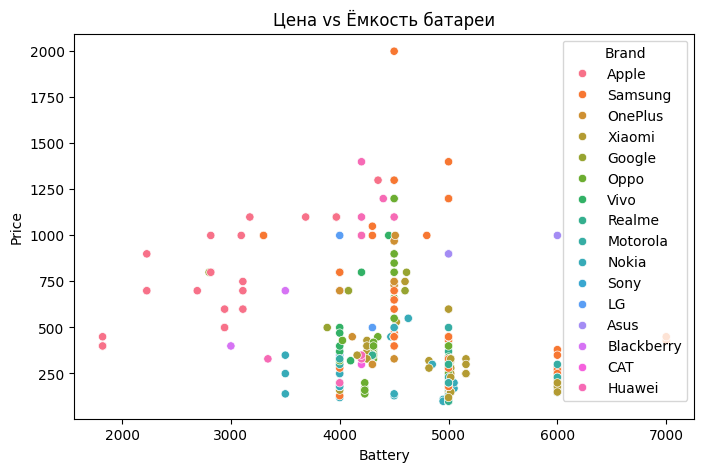

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df, x="Battery", y="Price", hue="Brand"
)
plt.title("Цена vs Ёмкость батареи")
plt.show()

## 5. Интерактивный график (`plotly`)
**Вопрос:** Как цена смартфонов зависит от размера экрана (интерактивно)?  

In [ ]:
import plotly.express as px

fig = px.scatter(
    df,
    x="ScreenSize",
    y="Price",
    color="Brand",
    size="Battery",
    hover_data=["Model"],
    title="Цена vs Размер экрана",
)
fig.show()

## 6. Визуализация распределений
**Вопрос:** Как распределены цены смартфонов?

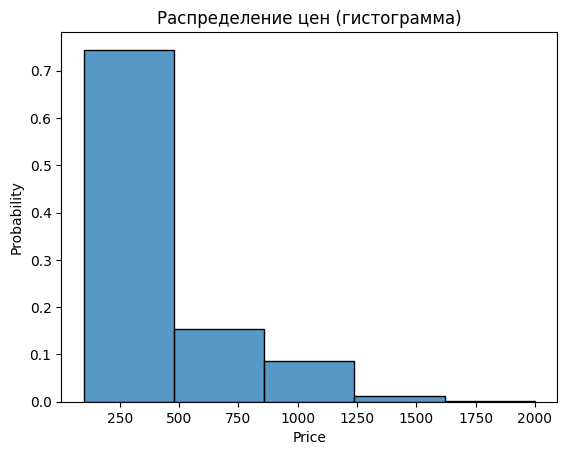

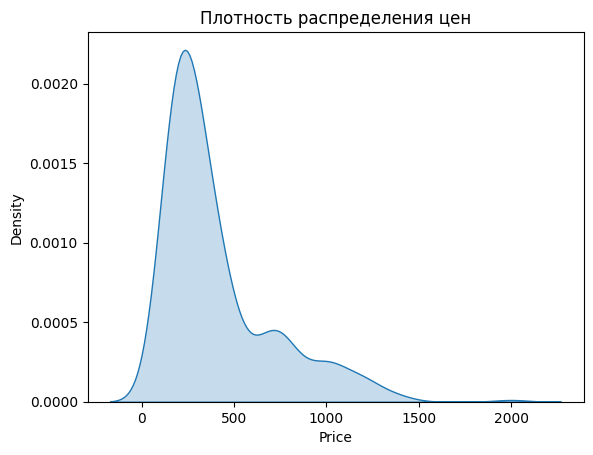

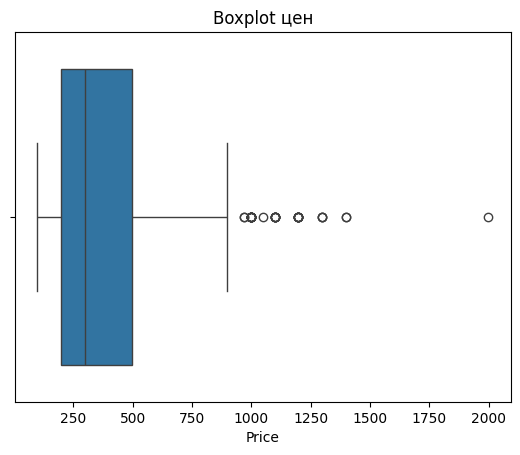

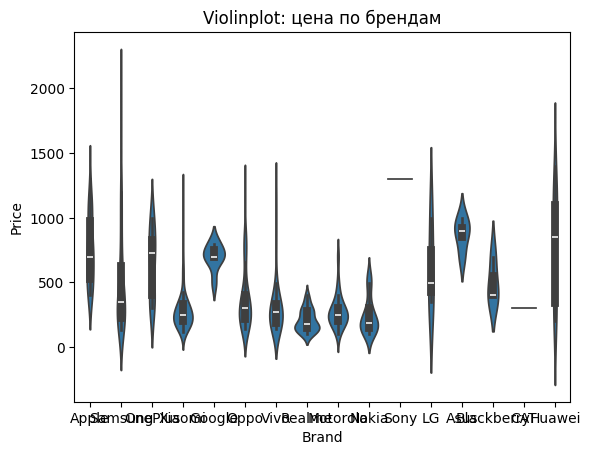

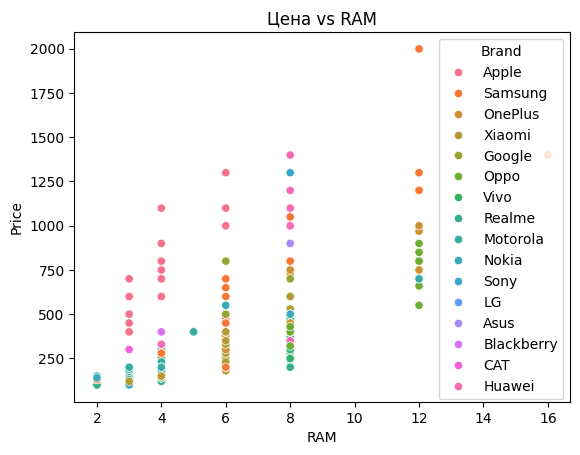

In [ ]:
# Гистограмма относительных частот
sns.histplot(df["Price"], stat="probability", bins=5)
plt.title("Распределение цен (гистограмма)")
plt.show()

# KDE-график
sns.kdeplot(df["Price"], fill=True)
plt.title("Плотность распределения цен")
plt.show()

# Boxplot
sns.boxplot(x="Price", data=df)
plt.title("Boxplot цен")
plt.show()

# Violinplot
sns.violinplot(x="Brand", y="Price", data=df)
plt.title("Violinplot: цена по брендам")
plt.show()

# Scatterplot
sns.scatterplot(x="RAM", y="Price", data=df, hue="Brand")
plt.title("Цена vs RAM")
plt.show()

## 7. Тесты на свойства распределения
**Вопрос:** Является ли распределение цен нормальным?  

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df["Price"])
print("Shapiro-Wilk test: stat=%.3f, p=%.7f" % (stat, p))
if p > 0.05:
    print("Данные похожи на нормальное распределение")
else:
    print("Данные НЕ нормальны")

Shapiro-Wilk test: stat=0.812, p=0.0000000
Данные НЕ нормальны


## 8. One Hot Encoding для категориальных признаков
**Вопрос:** Сделаем классы смартфонов по цене:
- дешевый (до 500),  
- средний (500–900),  
- премиум (свыше 900).  

Затем применим OHE.  

In [ ]:
# создаём категорию по цене
df["Price_Class"] = pd.cut(
    df["Price"],
    bins=[0, 500, 900, float("inf")],
    labels=["Budget", "Mid", "Premium"],
)

# One Hot Encoding
df_encoded = pd.get_dummies(df, columns=["Price_Class"])
print(df_encoded.head())

     Brand              Model  Storage  RAM  ScreenSize  Battery  Camera  \
0    Apple      iPhone 13 Pro      128    6        6.10     3095    36.0   
1  Samsung   Galaxy S21 Ultra      256   12        6.80     5000   140.0   
2  OnePlus              9 Pro      128    8        6.70     4500   108.0   
3   Xiaomi  Redmi Note 10 Pro      128    6        6.67     5020    79.0   
4   Google            Pixel 6      128    8        6.40     4614   172.0   

   Price       Year  Price_Class_Budget  Price_Class_Mid  Price_Class_Premium  
0    999 2023-01-01               False            False                 True  
1   1199 2020-01-01               False            False                 True  
2    899 2023-01-01               False             True                False  
3    279 2020-01-01                True            False                False  
4    799 2022-01-01               False             True                False  


<font color='DarkOrange'>**Задание 2 [баллов: 4]:**</font>

1.Выберите один из признаков как таргет (регрессант, предиктант), также выберите некоторе число признаков в качестве регрессоров (предикторов). Обоснуйте, что эти признаки имеет смысл использовать как регрессоры, исходя из предметной области (природы датасета), проведите аналитику - представьте код и рисунки. [<font color='DarkOrange'>1 балл</font>]

<font color='DarkOrange'>Важно! </font> Если выполняете исследование данных до разделения на обучающую, которая нужна для моделирования, и отложенную выборки (тестовую), то это потенциал для утечек (data leakage)! Следует сразу отделить часть данных, исследовать их только перед прогоном на уже обученной готовой модели!

2.Обучите линейную регрессионную модель без регуляризации. Проиллюстрируйте процесс обучения и тестирования модели, запишите выводы о качестве. Метрики: RMSE, MAE, $R^{2}$ [<font color='DarkOrange'>1 балл</font>]

3.Обучите линейную регрессионную модель с регуляризацией (любой). Для предобработки осуществите удаление выбросов и нормирование - запишите обоснование для выбора способа поиска выбросов и нормирования. Используйте для этапов Pipeline из sklearn. Проиллюстрируйте процесс обучения и тестирования модели, запишите выводы о качестве. Метрики: RMSE, MAE, $R^{2}$ [<font color='DarkOrange'>2 балла</font>]

In [ ]:
from sklearn.model_selection import train_test_split

final_df = df[[
    "Brand", "Storage", "RAM",
    "ScreenSize", "Battery", "Camera", "Price"
]]

X = final_df.drop("Price", axis=1)
y = final_df["Price"]

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (325, 6)
Размер тестовой выборки: (82, 6)


### 1. Выбор признаков и их анализ

**Таргет (регрессант):** `Price` (Цена). Это наиболее логичная зависимая переменная в данном датасете, так как цена является конечным рыночным результатом технических характеристик и бренда.

**Регрессоры (предикторы):**
*   `Storage` (Объем хранилища)
*   `RAM` (Объем оперативной памяти)
*   `Battery` (Емкость батареи)
*   `Camera` (Суммарное кол-во мегапикселей)
*   `Brand` (Бренд)
*   `ScreenSize` (Размер экрана)

**Обоснование выбора регрессоров:**
С точки зрения предметной области (рынок смартфонов), все выбранные признаки напрямую влияют на себестоимость и рыночную цену устройства:
*   **RAM и Storage:** Больший объем памяти делает телефон более производительным и дорогим. Это одни из ключевых характеристик.
*   **Battery, Camera, ScreenSize:** Улучшенные компоненты (ёмкая батарея, продвинутая камера, большой и качественный экран) увеличивают стоимость производства и, соответственно, конечную цену.
*   **Brand:** Бренд несет в себе маркетинговую ценность. Премиум-бренды (например, Apple) могут устанавливать более высокую цену на устройства с аналогичными характеристиками по сравнению с бюджетными брендами.

**Аналитика (на обучающей выборке во избежание data leakage):**

Проверим корреляцию числовых признаков с целевой переменной `Price`. Для этого временно объединим `X_train` и `y_train`.

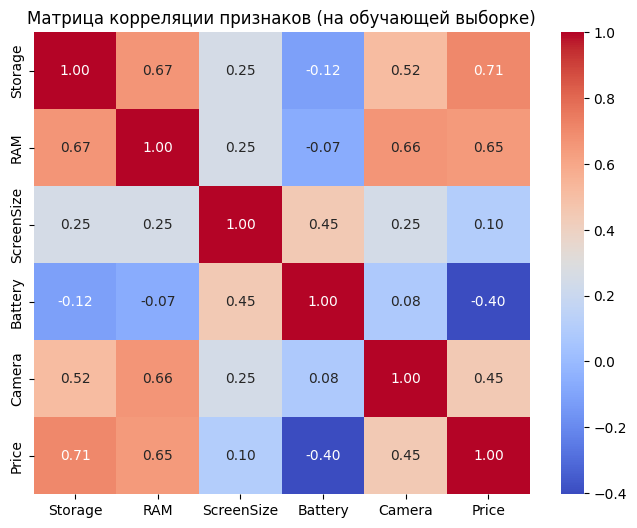

In [ ]:
# Анализ корреляции только на обучающих данных
train_data_for_eda = pd.concat([X_train, y_train], axis=1)

# Выбираем только числовые столбцы для матрицы корреляции
numeric_cols = train_data_for_eda.select_dtypes(include=np.number).columns

plt.figure(figsize=(8, 6))
sns.heatmap(
    train_data_for_eda[numeric_cols].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Матрица корреляции признаков (на обучающей выборке)")
plt.show()

Анализ корреляционной матрицы на обучающей выборке подтвердил целесообразность этого выбора: `Storage` (0.71) и `RAM` (0.65) показали сильную положительную связь с ценой, являясь ключевыми предикторами. При этом была выявлена контринтуитивная отрицательная корреляция у `Battery` (-0.40), что, вероятно, связано с сегментацией рынка, где бюджетные модели оснащаются более ёмкими аккумуляторами. Несмотря на слабую предсказательную силу `ScreenSize` (0.10), выбранный набор признаков в целом демонстрирует сильную статистическую связь с ценой и подходит для построения модели.

### 2. Линейная регрессия без регуляризации

Для простой линейной регрессии нам нужно только закодировать категориальный признак `Brand`.

--- Модель: Линейная регрессия без регуляризации ---
RMSE: 134.06
MAE: 90.30
R^2: 0.80


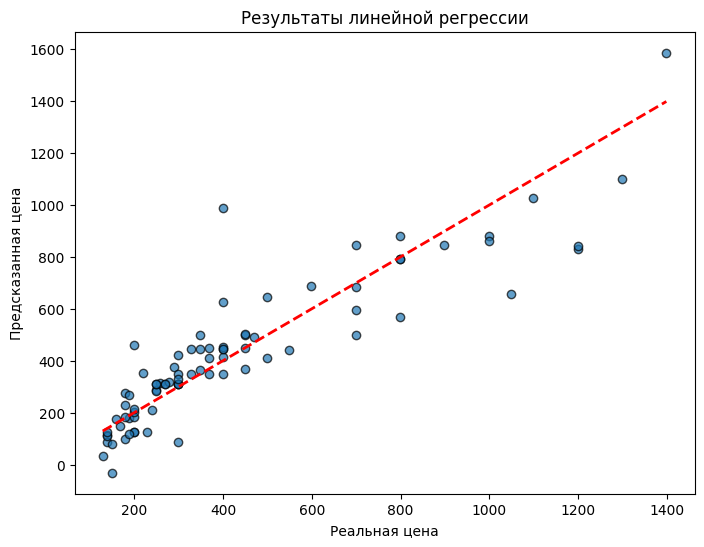

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Определяем числовые и категориальные признаки
numeric_features = ["Storage", "RAM", "ScreenSize", "Battery", "Camera"]
categorical_features = ["Brand"]

# Создаем препроцессор для колонок
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore"), # Игнорируем бренды, которых нет в train
            categorical_features,
        )
    ],
    remainder="passthrough", # Оставляем числовые столбцы без изменений
)

# Создаем пайплайн: 1. Препроцессинг, 2. Модель
model_lr = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression()),
    ]
)

# Обучаем модель
model_lr.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred_lr = model_lr.predict(X_test)

# Оцениваем качество модели
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("--- Модель: Линейная регрессия без регуляризации ---")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R^2: {r2_lr:.2f}")

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, edgecolors="k")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    lw=2
)
plt.xlabel("Реальная цена")
plt.ylabel("Предсказанная цена")
plt.title("Результаты линейной регрессии")
plt.show()

Обученная линейная регрессия без регуляризации показала хорошее качество, объяснив 80% дисперсии цены (R² = 0.80). Средняя абсолютная ошибка (MAE) составила $90.30, что является приемлемым показателем для данного диапазона цен. Визуальный анализ графика показывает, что точки в основном следуют за линией идеального предсказания, однако наблюдается увеличение разброса (ошибки) для более дорогих моделей, а также наличие заметных выбросов. Это указывает на то, что модель хуже справляется с предсказанием цен в премиум-сегменте и есть потенциал для улучшения через предобработку данных.

### 3. Линейная регрессия с регуляризацией (Ridge) и Pipeline

Здесь мы добавим удаление выбросов и нормирование данных.

**Обоснование предобработки:**
1.  **Поиск и удаление выбросов:** Выбросы (аномально дорогие или дешевые телефоны для своих характеристик) могут сильно смещать линишщю регрессии и ухудшать её предсказательную способность. Мы будем использовать **метод межквартильного размаха (IQR)** для их поиска. Этот метод является робастным (устойчивым) к самим выбросам и не требует предположения о нормальности распределения данных. Мы будем удалять выбросы только по целевой переменной `Price` в обучающей выборке.
2.  **Нормирование (масштабирование):** Признаки имеют разные масштабы (например, `RAM` от 4 до 16, а `Battery` от 3000 до 5000). Модели с регуляризацией (Ridge, Lasso) штрафуют большие коэффициенты. Без нормирования признак с большим масштабом может получить несправедливо малый коэффициент, и его вклад будет занижен. Мы используем `RobustScaler`.

In [ ]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
# Удаление выбросов из ОБУЧАЮЩЕЙ выборки по методу IQR
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем X_train и y_train
outliers_mask = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train_no_outliers = X_train[outliers_mask]
y_train_no_outliers = y_train[outliers_mask]

print(f"Исходный размер обучающей выборки: {len(X_train)}")
print(f"Размер после удаления выбросов: {len(X_train_no_outliers)}")

# Создание пайплайна с нормированием и регуляризацией
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

# Создаем пайплайн с моделью Ridge (L2-регуляризация)
model_ridge = Pipeline(
    steps=[
        ("preprocessor", preprocessor_scaled),
        ("regressor", Ridge(alpha=1.0)), # alpha - сила регуляризации
    ]
)

# Обучение и тестирование модели
model_ridge.fit(X_train_no_outliers, y_train_no_outliers)
y_pred_ridge = model_ridge.predict(X_test)

# Оценка качества
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\n--- Модель: Ridge регрессия с предобработкой ---")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"MAE: {mae_ridge:.2f}")
print(f"R^2: {r2_ridge:.2f}")

# Сравнение с простой моделью
print("\n--- Сравнение метрик ---")
print(f"R^2: {r2_ridge:.2f} (Ridge) vs {r2_lr:.2f} (Linear)")
print(f"RMSE: {rmse_ridge:.2f} (Ridge) vs {rmse_lr:.2f} (Linear)")

Исходный размер обучающей выборки: 325
Размер после удаления выбросов: 297

--- Модель: Ridge регрессия с предобработкой ---
RMSE: 151.74
MAE: 95.91
R^2: 0.75

--- Сравнение метрик ---
R^2: 0.75 (Ridge) vs 0.80 (Linear)
RMSE: 151.74 (Ridge) vs 134.06 (Linear)


Несмотря на применение продвинутых техник предобработки, модель `Ridge` регрессии с удалением выбросов и нормированием показала **ухудшение** по сравнению с базовой линейной регрессией. Коэффициент детерминации $R^2$ снизился с 0.80 до 0.75, а ошибка RMSE, наоборот, выросла со 134.06 до 151.64. Наиболее вероятной причиной такого результата является слишком агрессивное удаление выбросов (было удалено 28 записей), которые, возможно, несли важную информацию о поведении цен в крайних сегментах рынка.для данного конкретного набора данных более простая модель оказалась более эффективной.

<font color='MediumSeaGreen'>**Задание 3 [баллов: 2] - бонусные баллы:**</font>

По итогам лекции №1 ответьте на вопросы о месте искусственного интеллекта среди инноваций в крупной компании (пример "Норильского никеля" - см видео в группе в ТГ).

1.Какие задачи моделирования и управления решаются?

2.Какие разделы/формальные задачи ИИ задействованы?

3.Какие физико-химические признаки для них используются?

4.Укажите (предположите) для нескольких признаков: числовые или категориальные, временная и пространственная дискретность регистрации, сырой признак или агрегат по нескольким, сильно зашумленный, много ли пропусков, особенности закона распределения, потенциал для data leakage


1.  Решаются задачи оптимизации технологических процессов, такие как подбор параметров взрыва и управление флотацией, а также задачи контроля, включая позиционирование техники, мониторинг промбезопасности и отслеживание отклонений при строительстве. Внедряются системы-советчики для операторов.

2.  Активно задействованы компьютерное зрение для видеоаналитики и навигации, машинное обучение для регрессионного моделирования и управления процессами в реальном времени, а также имитационное моделирование. В разработке находится применение генеративных моделей и NLP для систем-подсказчиков.

3.  Используются физические признаки, такие как визуальные данные о размере и цвете руды, пространственные координаты от LiDAR, а также показания технологических сенсоров, например, объемы подаваемой руды, воды и воздуха. Применяются и химические признаки, в частности, данные о спектральном составе отходящих газов.

4.  Для признака "размер руды" можно предположить, что он числовой, регистрируется дискретно во времени, является агрегированным и сильно зашумленным из-за пыли, а его распределение отлично от нормального; потенциал для data leakage здесь низкий. Спектр отходящих газов, в свою очередь, является многомерным числовым временным рядом (сырой признак), где потенциал для утечки данных выше, если в обучение попадут данные, зависящие от будущего состояния процесса.

<font color='MediumSeaGreen'>**Задание 4 [баллов: 3] - бонусные баллы:**</font>

Покажите, что из максимизации правдоподобия выборки невязок, распределенных по нормальному закону, следует задача минимизации ошибки MSE, вычисленной по этим невязкам.

Обоснование принесет вам 2 балла.
Если выполните не на листе бумаги, а заполните ячейку (математические символы), то получите ещё 1 балл. Пример текста с математикой ниже

<font color='MediumSeaGreen'>***Пример текста***</font>

Из курса математического анализы мы знаем, что тригонометрические функции можно также применять к матрицам. Чтобы найти $sin(X)$, где $X \in \mathbb{R}^{n\times n}$ – матрица с $n$ строками и $n$ столбцами, достаточно разложить функцию синус в ряд Тейлора:

$sin(x) = \sum_{i=1}^{\infty} a_i(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!}+\dots$

И вместо $x$ подставить матрицу $X$:

$sin(X) = X - \frac{X^3}{3!} + \frac{X^5}{5!} - \frac{X^7}{7!}+\dots$

Тогда $sin(X)$ – тоже матрица!

Ограничимся 15 степенью, то есть:
$sin(X) \approx X - \frac{X^3}{3!} + \frac{X^5}{5!} - \frac{X^7}{7!}+ \dots - \frac{X^{15}}{15!}$